In [33]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

# Problem 1

Let $f(x)=-x_1^2-4x_2^2$. Consider two different points

$\tilde{x} = [2,0]^T$ and $\bar{x} = [\sqrt{3},1/2]^T$

Show that $\nabla f(\tilde{x})^Tx'(\tilde{t}) = \nabla f(\bar{x})^Tx'(\bar{t})$

Hint: Consider the level set of f at the level $c=-4$. Define a parametric curve of a curve passing through $\tilde{x}$ and $\bar{x}$, similar to what we did in lecture. 

First we calculate the gradient of our function f. This is given as 

$\nabla f =\begin{pmatrix} 
-2x_1 \\
-8x_2
\end{pmatrix}$

We can evaluate the gradient at the two given points as below

$\nabla f(\tilde{x}) =\begin{pmatrix} -2*2 \\ -8*0\end{pmatrix} =\begin{pmatrix} -4 \\ 0\end{pmatrix}$

$\nabla f(\bar{x}) =\begin{pmatrix} -2*\sqrt{3} \\ -8*(1/2)\end{pmatrix} =\begin{pmatrix} -2\sqrt{3} \\ -4\end{pmatrix}$


We consider the level set of f at the level $c=-4$. 

This set is $S=\{x \in \mathbb{R}\ |\ x_1^2 + 4x_2^2 = 4 \}$. We use this to parametrize to get $x(t) = [2cos(t), sin(t)]^T$. We see that therefore for $\tilde{x}$, then $\tilde{t}=0$ and for $\bar{x}$, then $\bar{t}=\pi/6$

We then need the derivative of our parametrization, getting $x'(t) = [-2sin(t), cos(t)]^T$

We evaluate this at the two points, getting

$$x'(\tilde{x}) =\begin{pmatrix} -2\sin(0) \\ \cos(0) \end{pmatrix} =\begin{pmatrix} 0 \\ 1\end{pmatrix}$$

$$x'(\bar{x}) =\begin{pmatrix} -2\sin(\pi/6) \\ \cos(\pi/6) \end{pmatrix} =\begin{pmatrix} -1 \\ \sqrt{3}/2\end{pmatrix}$$


From the lecture notes, we know that the vetcors $\nabla f(x)$ and $x'(t)$ are orthogonal, so both of the above  should equal 0 and therefore equal each other. Let us check. 

$\nabla{f(\tilde{x})}^Tx'(\tilde{x})=\begin{pmatrix} -4 & 0 \end{pmatrix}\begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0$

$\nabla{f(\bar{x})}^Tx'(\bar{x})=\begin{pmatrix} -2\sqrt{3} & -4 \end{pmatrix}\begin{pmatrix} -1 \\ \sqrt{3}/2 \end{pmatrix} = 0$

Therefore, these are equal to each other and equal to 0.

# Problem 2

Consider the system of equations

$(x-1)^2 + (y-1)^2 - 1 = 0$

$x+y-1=0$

a. Draw the set of points on the plane tht satisfy each equation and indicate the solutions of the system

b. Solve the system exactly.

c. Apply Newton's method twice with $[x_0,y_0]^T = [1/2,1/2]^T$. Illustrate the corresponding steps geometrically. 

d. (Coding). Write a code to solve this problem and plot the trajectory of solution in a x-y plane, for N=30 iterations. 

We see that the form of the first equation is that of a circle centered on the point (1,1) of radius 1. The second equation is that of a line. We plot the two using python packages. 

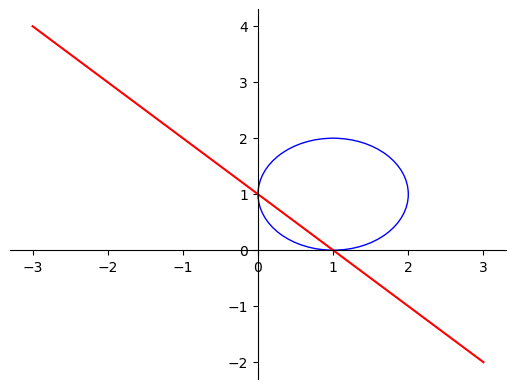

In [7]:
# 100 linearly spaced numbers
x = np.linspace(-3,3,100)

# the functions
y = 1-x
circle1 = plt.Circle((1, 1), 1, color='blue', fill=False)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')
ax.add_patch(circle1)

# show the plot
plt.show()

b. Solving the system exactly, we look for the intersections of the two equations. First we see from the plot that the intersections occur at (0,1) and (1,0).

c. Now we apply Newton's method. We know that for these kinds of equations, Newton's method is given as

$x^{(k+1)} = x^{(k)} - [J_f(x^{(k)})]^{-1}f(x^{(k)})$

Where $J$ is the jacobian of the function $f$ at $x_0$. We recall that $x_0 = [1/2,1/2]^T$

First we calculate the jacobian for our function. The jacobian is the matric of the form below:

$J = \begin{pmatrix} 
\frac{\partial{f_1}}{\partial{x}} & \frac{\partial{f_1}}{\partial{y}} \\
\frac{\partial{f_2}}{\partial{x}} & \frac{\partial{f_2}}{\partial{y}}
\end{pmatrix}$

We get $\frac{\partial{f_1}}{\partial{x}} = 2(x-1)$, $\frac{\partial{f_1}}{\partial{y}} = 2(y-1)$ , $\frac{\partial{f_2}}{\partial{x}} = 1$, $\frac{\partial{f_2}}{\partial{y}} = 1$


Therefore, the jacobian is given below, and then evaluated at $x_0$

$J(x_0) = \left. \begin{pmatrix} 
2x-2 & 2y-2 \\
1 & 1 
\end{pmatrix} \right\rvert_{x_0 = (1/2,1/2)^T} =
\begin{pmatrix} 
-1 & -1 \\
1 & 1 
\end{pmatrix}$

The inverse of this is does not exist because it is singular, so we add some noise to get

$\begin{pmatrix} 
0 & -1 \\
1 & 1 
\end{pmatrix}$ giving inverse of $\begin{pmatrix} 
-1 & 1 \\
-1 & 0 
\end{pmatrix}$


We then use the formula for newton's method for the first iteration. 

$\begin{pmatrix} 1/2 \\ 1/2 \end{pmatrix} - \begin{pmatrix} -1 & 1 \\ -1 & 0 \end{pmatrix} * \begin{pmatrix} (1/2 - 1)^2 + (1/2 - 1)^2 \\ 1/2 + 1/2 \end{pmatrix}$

$\begin{pmatrix} 1/2 \\ 1/2 \end{pmatrix} - \begin{pmatrix} -1 & 1 \\ -1 & 0 \end{pmatrix} * \begin{pmatrix} 1/2 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

Now we have to resolve the jacobian with this new point to get

$J = \begin{pmatrix} -2 & 0 \\ 1 & 1 \end{pmatrix}$ with and inverse of 

$\begin{pmatrix} -1/2 & 0 \\ 1/2 & 1 \end{pmatrix}$

Then we do the second iteration of the newton's method

$\begin{pmatrix} 0 \\ 1 \end{pmatrix} - \begin{pmatrix} -1/2 & 0 \\ 1/2 & 1 \end{pmatrix} * \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 1/2 \\ -1/2 \end{pmatrix}$

d. Now we can conduct Newton's method for 30 iterations. 

In [89]:
# newton's method
def iter_newton(X,function,jacobian,imax = 1e6):
    results = []
    for i in range(int(imax)):
        J = jacobian(X) # calculate jacobian J = df(X)/dY(X) 
        Y = function(X) # calculate function Y = f(X)
        # handle singularity - if error, then add some noise and calculate 
        try:
            dX = np.linalg.solve(J,Y) # solve for increment from JdX = Y 
        except:
            #generate tiny noise 
            J[0][0] = J[0][0] + random.random()
            dX = np.linalg.solve(J,Y) # solve for increment from JdX = Y               
        X -= dX # step X by dX 
        XL = X.tolist()
        results.append(XL)
    return results

# function and jacobian
def function(X):
    x = X[0]
    y = X[1]
    return [(x-1)**2+(y-1)**2-1, x+y-1]

def jacobian(X):
    x = X[0]
    y = X[1]
    return [[2*x-2,2*y-2],[1,1]]


[[1.1124981310762425, -0.11249813107624251], [1.0103313209082039, -0.010331320908203837], [1.000104575387925, -0.00010457538792483546], [1.000000010933725, -1.0933725162328377e-08], [0.9999999999999999, 7.913419868102082e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17], [1.0, -3.188810378149486e-17]

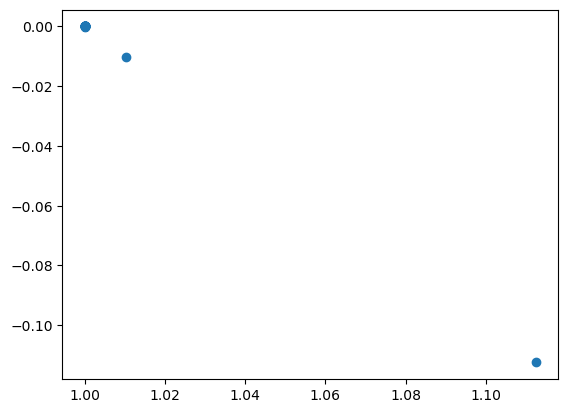

In [90]:
X_0 = np.array([1/2,1/2],dtype=float)
results = iter_newton(X_0,function,jacobian,imax=30)

print(results)

results_x = [x for x, y in results]
results_y = [y for x, y in results]

plt.plot(results_x,results_y, 'o')

results_df = pd.DataFrame({"x":results_x, "y":results_y})
results_df['iter'] = np.arange(results_df.shape[0])
